<a href="https://colab.research.google.com/github/AxelMoroz/Engineering/blob/main/Calculus_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculus Exercise**
need to calculate if limits exists in:

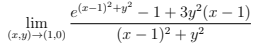

In [7]:
import sympy as sp
import pandas as pd

# Definición de símbolos
x, y = sp.symbols('x y', real=True)
expr = (sp.exp((x-1)**2 + y**2) - 1 + 3*y**2*(x-1)) / ((x-1)**2 + y**2)

# 1) Límites iterados
lim_xy = sp.limit(sp.limit(expr, x, 1), y, 0)
lim_yx = sp.limit(sp.limit(expr, y, 0), x, 1)

print("Límite iterado (x→1, luego y→0):", lim_xy)
print("Límite iterado (y→0, luego x→1):", lim_yx)

# 2) Serie/Taylor alrededor de (1,0)
u, v = sp.symbols('u v', real=True)
expr_uv = (sp.exp(u**2 + v**2) - 1 + 3*v**2*u) / (u**2 + v**2)
series_uv = sp.series(sp.exp(u**2 + v**2), u, 0, 3).removeO().series(v, 0, 3).removeO()
numerator_approx = (series_uv - 1) + 3*v**2*u
denominator = u**2 + v**2
leading = sp.simplify(sp.expand(numerator_approx) / denominator)

print("Término principal del cociente:", leading)

# 3) Chequeo numérico en trayectorias
import math

def f(xval, yval):
    return (math.exp((xval-1)**2 + yval**2) - 1 + 3*yval**2*(xval-1)) / ((xval-1)**2 + yval**2)

t_values = [1e-1, 1e-2, 1e-3, 1e-4]
ks = [0, 0.5, 1, 2, -1]

for kv in ks:
    print(f"\nTrayectoria y={kv}*t")
    for tv in t_values:
        xval = 1 + tv
        yval = kv * tv
        print(f"t={tv:.0e}, f(x,y)={f(xval,yval)}")


Límite iterado (x→1, luego y→0): 1
Límite iterado (y→0, luego x→1): 1
Término principal del cociente: (u**2*v**2 + u**2 + 3*u*v**2 + v**2)/(u**2 + v**2)

Trayectoria y=0*t
t=1e-01, f(x,y)=1.0050167084168153
t=1e-02, f(x,y)=1.0000500016671392
t=1e-03, f(x,y)=1.000000499962404
t=1e-04, f(x,y)=0.9999999939227494

Trayectoria y=0.5*t
t=1e-01, f(x,y)=1.0662761232507518
t=1e-02, f(x,y)=1.0060625026034256
t=1e-03, f(x,y)=1.0006006250622903
t=1e-04, f(x,y)=1.0000600116862737

Trayectoria y=1*t
t=1e-01, f(x,y)=1.1600670013377878
t=1e-02, f(x,y)=1.0151000066672806
t=1e-03, f(x,y)=1.0015010000067441
t=1e-04, f(x,y)=1.0001500050248695

Trayectoria y=2*t
t=1e-01, f(x,y)=1.2654219275204819
t=1e-02, f(x,y)=1.0242500416717015
t=1e-03, f(x,y)=1.002402500006802
t=1e-04, f(x,y)=1.0002400250088177

Trayectoria y=-1*t
t=1e-01, f(x,y)=1.1600670013377878
t=1e-02, f(x,y)=1.0151000066672806
t=1e-03, f(x,y)=1.0015010000067441
t=1e-04, f(x,y)=1.0001500050248695


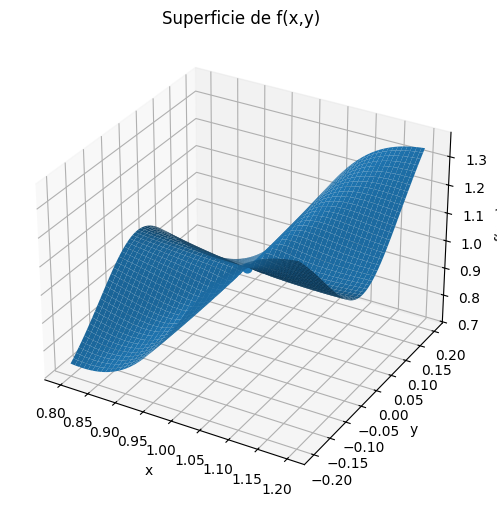

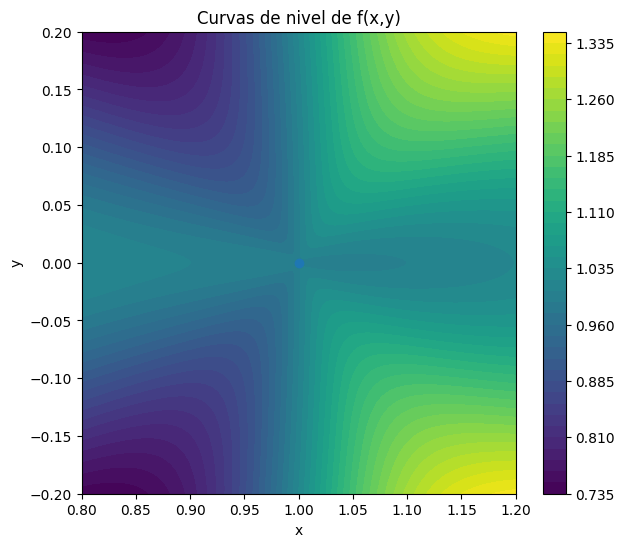

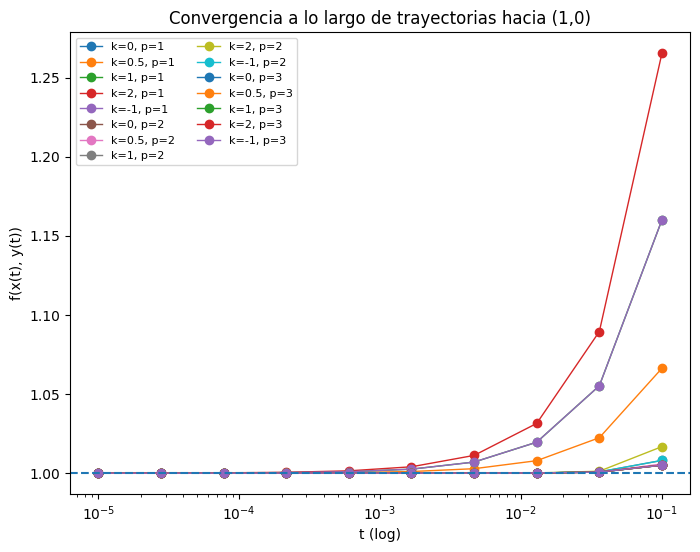

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (necesario para 3D)

# --- Definición de la función ---
def f(x, y):
    return (np.exp((x-1)**2 + y**2) - 1 + 3*y**2*(x-1)) / ((x-1)**2 + y**2)

# --- 1) Superficie 3D alrededor de (1,0) ---
X = np.linspace(0.8, 1.2, 200)
Y = np.linspace(-0.2, 0.2, 200)
Xg, Yg = np.meshgrid(X, Y)
Z = f(Xg, Yg)

fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(111, projection="3d")
ax.plot_surface(Xg, Yg, Z, linewidth=0, antialiased=True)
ax.set_title("Superficie de f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
# Punto objetivo
ax.scatter(1, 0, 1, s=40)  # (x,y,f)= (1,0,1)
plt.show()

# --- 2) Curvas de nivel (contour) ---
fig2 = plt.figure(figsize=(7,6))
cs = plt.contourf(Xg, Yg, Z, levels=40)
plt.colorbar(cs)
plt.title("Curvas de nivel de f(x,y)")
plt.xlabel("x")
plt.ylabel("y")
# Marcar (1,0)
plt.plot([1], [0], marker='o')
plt.show()

# --- 3) Convergencia por trayectorias: y = k * t^p, x = 1 + t ---
def f_scalar(xv, yv):
    return (math.exp((xv-1)**2 + yv**2) - 1 + 3*yv**2*(xv-1)) / ((xv-1)**2 + yv**2)

t_vals = np.logspace(-1, -5, 10)  # t -> 0
ks = [0, 0.5, 1, 2, -1]
powers = [1, 2, 3]  # rectas y curvas

fig3 = plt.figure(figsize=(8,6))
for p in powers:
    for k in ks:
        vals = []
        for t in t_vals:
            xv = 1 + t
            yv = k * (t**p)
            vals.append(f_scalar(xv, yv))
        plt.plot(t_vals, vals, marker='o', linewidth=1, label=f"k={k}, p={p}")

plt.axhline(1.0, linestyle='--')  # valor esperado del límite
plt.xscale('log')
plt.xlabel("t (log)")
plt.ylabel("f(x(t), y(t))")
plt.title("Convergencia a lo largo de trayectorias hacia (1,0)")
plt.legend(ncol=2, fontsize=8)
plt.show()
